# Content

#### 1. Introduction, Objective
#### 2. Datasets
#### 3-1. Business Understanding
#### 3-2.Data Understanding(EDA)
#### 3-3.Data Preparation
#### 3-4. Model
#### 3-5. Results
#### 4. Conclusion

### 1. Introduction, Objective

This is my first project for Udacity program. It uses the data about Boston's rental housing Airbnb has provided. This project focuses on the following 4 questions.

> 1. Distribution of Price, and supply and demand
> 2. Correlations between Price and other Features
> 3. Price pridiction model using Linear Regression Algorithm
> 4. The most frequently used comments in the Review dataset

### 2. Datasets

<blockquote> calendar.csv</blockquote>
<blockquote>listings.csv</blockquote>
<blockquote> reviews.csv</blockquote>

### 3-1. Business Understanding

Airbnb is a company that started in 2008, August by Brian Chesky, the founder. The company differenated themselves by exceeding their probability using the network. Airbnb provide accommodations worldwide, and by all kinds of types.

### 3-2. Data Understanding (EDA)

In [1]:
import pandas as pd
import numpy as np
from scipy import stats

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error


import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords  
from nltk.tokenize import word_tokenize 

review = pd.read_csv("reviews.csv")
lists = pd.read_csv("listings.csv")
calendar = pd.read_csv("calendar.csv")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Me\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


###### Calendar Data

- categorical variable: date, avilable, price
- numeric variables: listing_id

- missing value: price

In [2]:
calendar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1308890 entries, 0 to 1308889
Data columns (total 4 columns):
listing_id    1308890 non-null int64
date          1308890 non-null object
available     1308890 non-null object
price         643037 non-null object
dtypes: int64(1), object(3)
memory usage: 39.9+ MB


In [3]:
calendar.head()

,listing_id,date,available,price
0,12147973,2017-09-05,f,NaN
1,12147973,2017-09-04,f,NaN
2,12147973,2017-09-03,f,NaN
3,12147973,2017-09-02,f,NaN
4,12147973,2017-09-01,f,NaN


###### Listings Dataset

- values with no data: neighbourhood_group_cleansed, has_availability, license, jurisdiction_names

In [4]:
lists.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3585 entries, 0 to 3584
Data columns (total 95 columns):
id                                  3585 non-null int64
listing_url                         3585 non-null object
scrape_id                           3585 non-null int64
last_scraped                        3585 non-null object
name                                3585 non-null object
summary                             3442 non-null object
space                               2528 non-null object
description                         3585 non-null object
experiences_offered                 3585 non-null object
neighborhood_overview               2170 non-null object
notes                               1610 non-null object
transit                             2295 non-null object
access                              2096 non-null object
interaction                         2031 non-null object
house_rules                         2393 non-null object
thumbnail_url                       2986

In [5]:
lists.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,12147973,https://www.airbnb.com/rooms/12147973,20160906204935,2016-09-07,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...",The house has an open and cozy feel at the sam...,"Cozy, sunny, family home. Master bedroom high...",none,"Roslindale is quiet, convenient and friendly. ...",...,NaN,f,NaN,NaN,f,moderate,f,f,1,NaN
1,3075044,https://www.airbnb.com/rooms/3075044,20160906204935,2016-09-07,Charming room in pet friendly apt,Charming and quiet room in a second floor 1910...,Small but cozy and quite room with a full size...,Charming and quiet room in a second floor 1910...,none,"The room is in Roslindale, a diverse and prima...",...,9.0,f,NaN,NaN,t,moderate,f,f,1,1.30
2,6976,https://www.airbnb.com/rooms/6976,20160906204935,2016-09-07,Mexican Folk Art Haven in Boston,"Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...",none,The LOCATION: Roslindale is a safe and diverse...,...,10.0,f,NaN,NaN,f,moderate,t,f,1,0.47
3,1436513,https://www.airbnb.com/rooms/1436513,20160906204935,2016-09-07,Spacious Sunny Bedroom Suite in Historic Home,Come experience the comforts of home away from...,Most places you find in Boston are small howev...,Come experience the comforts of home away from...,none,Roslindale is a lovely little neighborhood loc...,...,10.0,f,NaN,NaN,f,moderate,f,f,1,1.00
4,7651065,https://www.airbnb.com/rooms/7651065,20160906204935,2016-09-07,Come Home to Boston,"My comfy, clean and relaxing home is one block...","Clean, attractive, private room, one block fro...","My comfy, clean and relaxing home is one block...",none,"I love the proximity to downtown, the neighbor...",...,10.0,f,NaN,NaN,f,flexible,f,f,1,2.25


###### Review Dataset
- categorical variable: date, reviewer_name, comments
- numeric variables: listing_id, id, reviewer_id

- missing value: comments

In [6]:
review.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68275 entries, 0 to 68274
Data columns (total 6 columns):
listing_id       68275 non-null int64
id               68275 non-null int64
date             68275 non-null object
reviewer_id      68275 non-null int64
reviewer_name    68275 non-null object
comments         68222 non-null object
dtypes: int64(3), object(3)
memory usage: 3.1+ MB


In [7]:
review.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,1178162,4724140,2013-05-21,4298113,Olivier,My stay at islam's place was really cool! Good...
1,1178162,4869189,2013-05-29,6452964,Charlotte,Great location for both airport and city - gre...
2,1178162,5003196,2013-06-06,6449554,Sebastian,We really enjoyed our stay at Islams house. Fr...
3,1178162,5150351,2013-06-15,2215611,Marine,The room was nice and clean and so were the co...
4,1178162,5171140,2013-06-16,6848427,Andrew,Great location. Just 5 mins walk from the Airp...


### 3-3 Data Preparation

###### Delete Duplicates

In [8]:
calendar.drop_duplicates(keep=False, inplace=True)
lists.drop_duplicates(keep=False, inplace=True)
review.drop_duplicates(keep=False, inplace=True)

###### Change date, price

In [9]:
#only rent available calendar

ok_calendar = calendar[calendar.available == 't']
#ok_cal_null = set(ok_calendar.columns[ok_calendar.isnull().any()])

In [10]:
ok_calendar['date'] = pd.to_datetime(ok_calendar['date'])

#only leave numbers and change price to numeric
num_price = lambda x: (x.replace('.00','').replace('$','').replace(',',''))
ok_calendar.price = pd.to_numeric(ok_calendar.price.apply(num_price))

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:5096: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [11]:
#change price of lists dataframe

lists.price = pd.to_numeric(lists.price.apply(num_price))

In [12]:
calendar['date'] = pd.to_datetime(calendar['date'])

calendar = calendar.sort_values(by = 'date')

start = calendar['date'].min()
end = calendar['date'].max()

print("start",start,'end',end)

start 2016-09-06 00:00:00 end 2017-09-05 00:00:00


In [13]:
review['date'] = pd.to_datetime(review['date'])
review = review.sort_values(by = 'date')

start = review['date'].min()
end = review['date'].max()

print('start',start,'end',end)

start 2009-03-21 00:00:00 end 2016-09-06 00:00:00


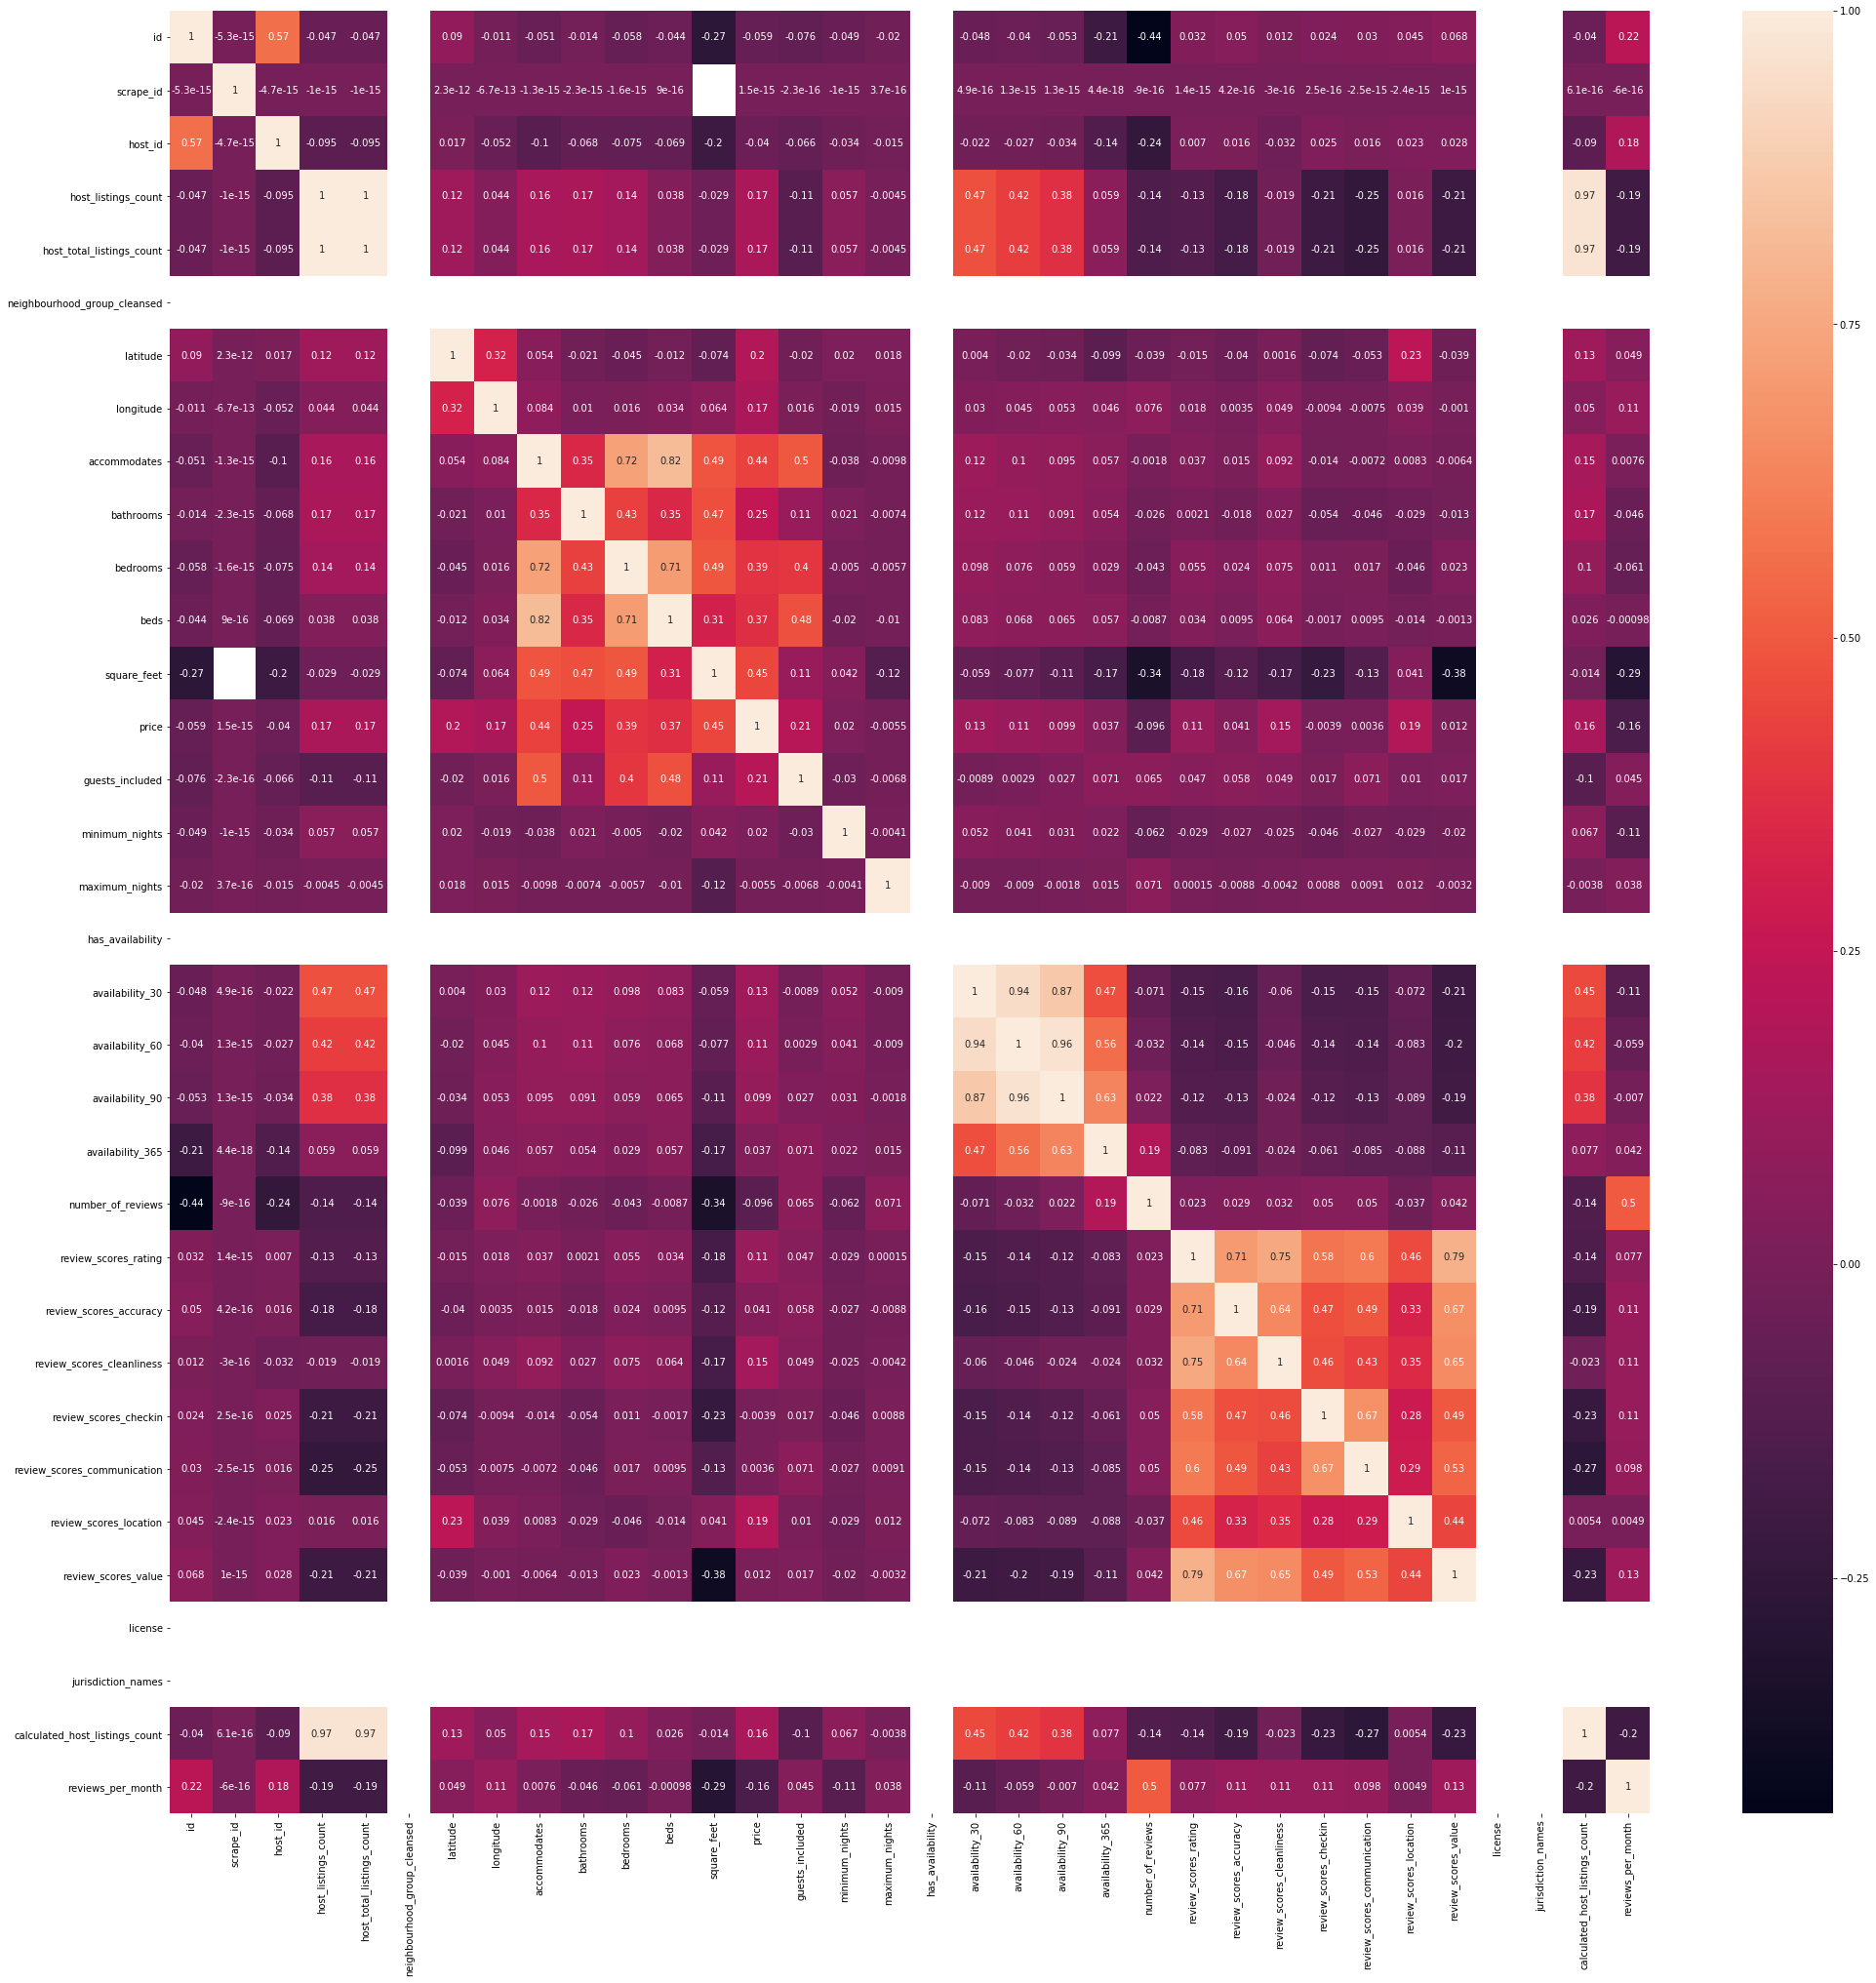

In [14]:
#list dataset
lists_cat = lists.select_dtypes(include = 'object')
lists_num = lists.select_dtypes(exclude = 'object')

(x, y) =lists_num.shape

plt.figure(figsize = (y,y))
sns.heatmap(data = lists_num.corr(),annot = True)

###### Drop outliers

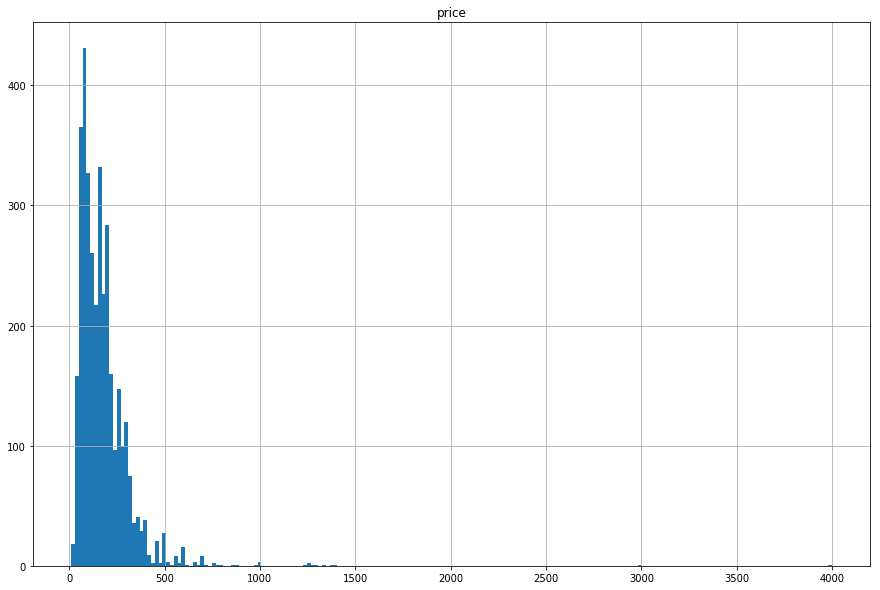

In [15]:
lists.hist(column = 'price', bins = 200, figsize = (15,10))

plt.show()

In [16]:
print(lists.price.mean(), lists.price.median())

173.9258019525802 150.0


We can drop the outliers

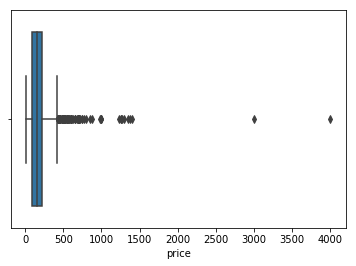

In [17]:
sns.boxplot(x= lists.price)

delete values over 3 zscore

In [18]:
z_score = np.abs(stats.zscore(lists.price))

In [19]:
print(np.where(z_score > 3))

(array([ 297,  391,  408,  793,  889,  894, 1022, 1085, 1109, 1234, 1262,
       1280, 1399, 1488, 1758, 1764, 1854, 1896, 1903, 1932, 1950, 1966,
       1978, 2204, 2285, 2394, 2448, 2484, 2485, 3055, 3096, 3121, 3215,
       3242], dtype=int64),)


In [20]:
lists.shape

(3585, 95)

In [21]:
z_price = lists[(z_score<3)]

lists.shape, z_price['price'].shape

((3585, 95), (3551,))

In [22]:
#apply changes to lists dataframe
lists = lists.drop(lists[(z_score>3)].index)

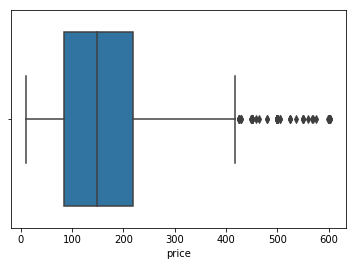

In [23]:
sns.boxplot(x= z_price.price)

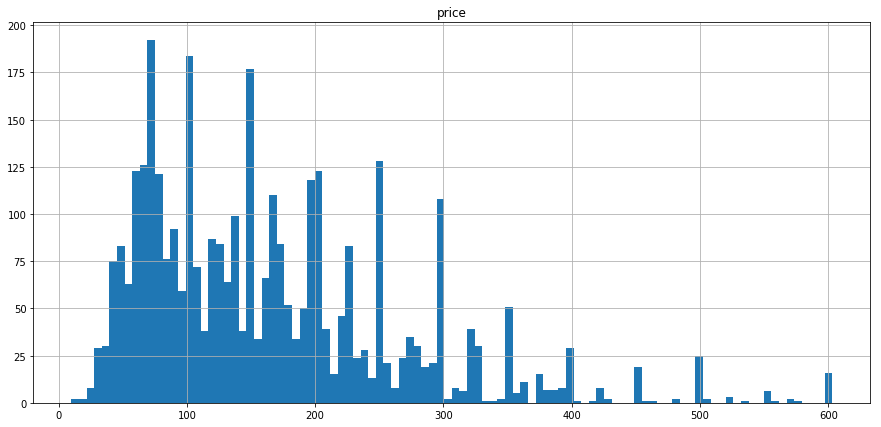

In [24]:
z_price.hist(column = "price", bins = 100, figsize = (15, 7) )
plt.show()

In [25]:
print(z_price.price.mean(), z_price.price.median())

165.52238805970148 149.0


In [26]:
# Round the date by month
calendar['first_date'] = pd.to_datetime(calendar.date) + pd.offsets.MonthBegin(0)

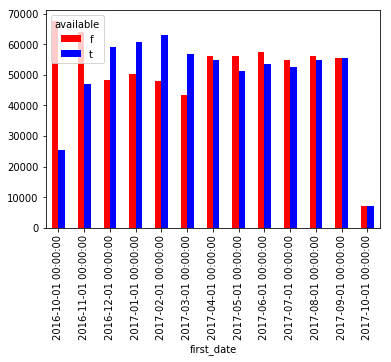

In [27]:
# bar graph of demand, supply by month
bar_cal = calendar.groupby(['first_date','available'])
bar_cal.available.size().unstack().plot(kind='bar',color=['r','b'])

### >Q1.Distribution of Prices, supply/demand

-The price is concentrated around 150, while the median is 149 and the mean is 165.

-The supply is short compared to the demand most of the year.

##### Correlation between price and values(Heatmap)

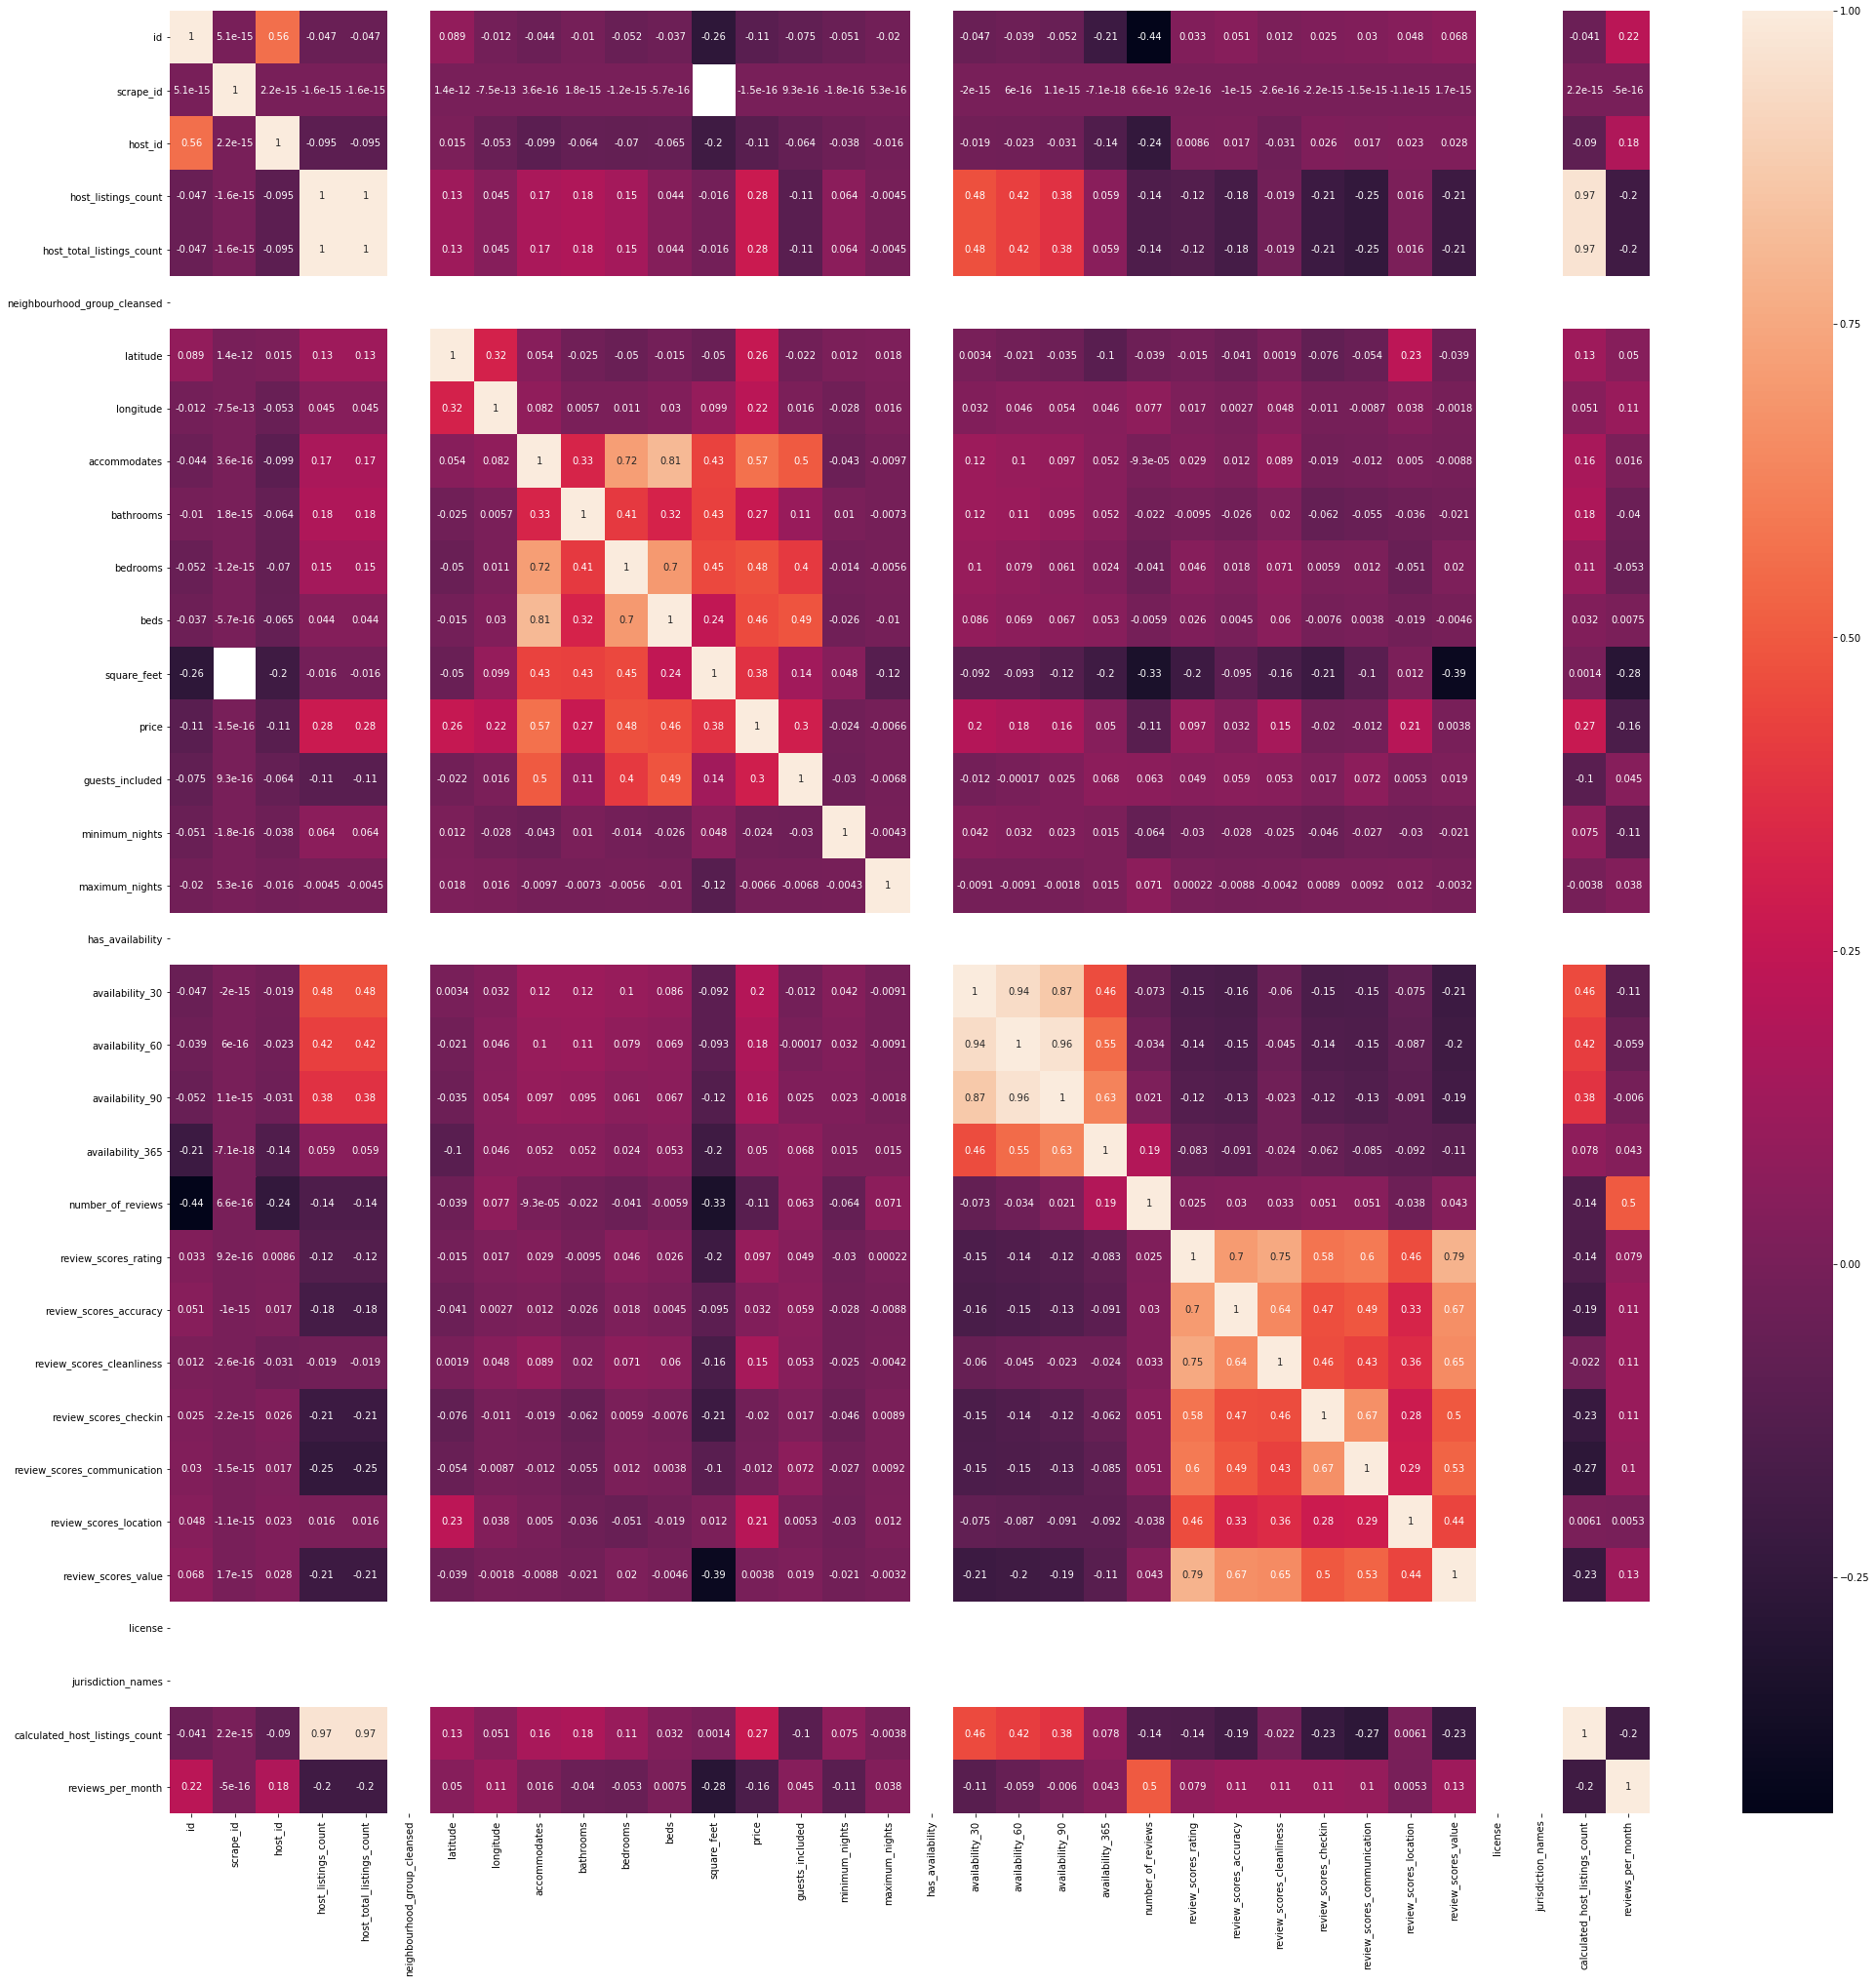

In [28]:
z_price_num = z_price.select_dtypes(exclude = 'object')

(x, y) =z_price_num.shape

plt.figure(figsize = (y,y))
sns.heatmap(data = z_price_num.corr(),annot = True)

### >Q2. Correlations between Price and other Features

Heatmap shows that price is related to bedroom, accomodates, beds, and square_feet

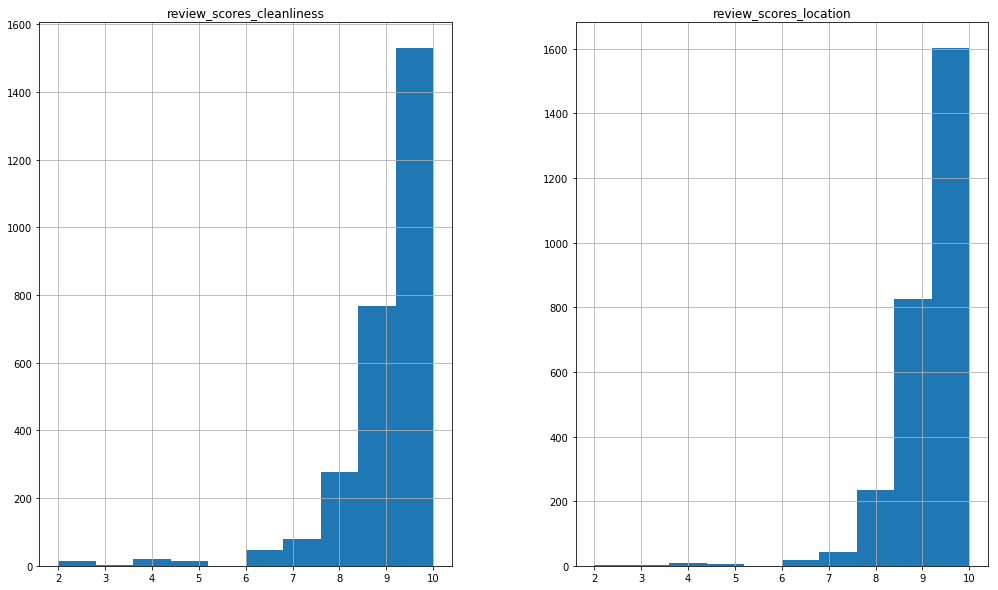

In [29]:
lists.hist(bins=10, column = ['review_scores_location', 'review_scores_cleanliness'], figsize=(17,10))

plt.show()

###### X is columns that zscores with price was higher than 0.15 

### 3-4. Model (Linear Regression)

In [30]:
# Train Test
lists.reset_index()
part = lists[["price","accommodates", "bathrooms", "bedrooms", "beds", "review_scores_cleanliness", "review_scores_location"]]
part.dropna(axis=0, how = 'any', inplace = True) # 행에 결측값있으면 드랍

# 
X = part[["accommodates", "bathrooms", "bedrooms", "beds", "review_scores_cleanliness", "review_scores_location"]]
y = part['price']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size =0.3, random_state = 42)

l_model = LinearRegression(normalize = True)
l_model.fit(X_train, y_train)

y_test_predict = l_model.predict(X_test)

r2_test = r2_score(y_test, y_test_predict)

print(r2_test,len(y_test))

0.4221014317173689 816


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


### >Q3. Price pridiction model using Linear Regression Algorithm

The model had 0.4221014317173689 for R-squared score on 816 values.

In [34]:
#Frequency of words in comment 
review['new'] = review['comments'].str.lower().str.replace('[^\w\s]','')

new_c = review.new.str.split(expand=True).stack().value_counts().reset_index()
new_c.columns = ['word','frequency']

new_c.word

0                    the
1                    and
2                     to
3                      a
4                    was
5                     in
6                     is
7                     we
8                   very
9                      i
10                    of
11                   for
12                 great
13                    it
14                  with
15                  stay
16                boston
17                 place
18             apartment
19                  were
20                   our
21                   had
22                 clean
23                    as
24                  this
25                   you
26              location
27                    at
28                    my
29                    us
              ...       
56225               문제없이
56226      busmetrofähre
56227            leggete
56228           curiosos
56229            nötiger
56230              recco
56231         aléatoires
56232            fumbles
56233    restaurantscant


In [45]:
# delete stopwords
stop = stopwords.words('english')

for word in new_c.word:
    if word in stop:
        print(word)
        new_c.drop(new_c[new_c['word']==word].index.values, inplace=True)

In [65]:
#sort only the most used 20 words

part = new_c[:20].sort_values(by = 'frequency', ascending = True)

,word,frequency
55,good,11496
52,time,12259
51,recommend,12463
49,really,12599
46,easy,12948
43,everything,13832
42,house,14402
39,comfortable,15875
37,host,17658
34,would,18826


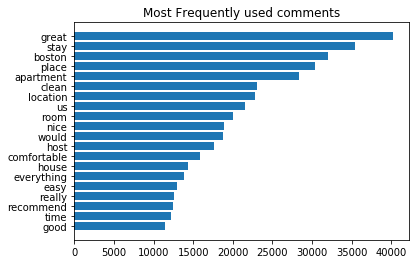

In [68]:
#part.plot.barh()

y = np.arange(len(part))
w = part['word']
f = part['frequency']

plt.barh(y, f)
plt.yticks(y,w)
plt.title('Most Frequently used comments')

plt.show()

### >Q4. The most frequently used comments in the Review dataset

The most frequently used word was 'great'.

Else were 'stay', 'boston', 'place', 'apartment', 'clean' etc.

### 4. Conclusion

- After finding out the most frequently used comment word, I could find out most of the words positive, such as great, clean, nice, comfortable. From this fact I could guess that clients who were satisfied mostly left a review. 

- From the calendar dataset I found out that demand out numbered the supply most of the month. So the company could try to increase the supply in the Boston region.

- The rate for one night was mostly focused between $150~160. And the type, beds, bedrooms, bathroom, review of cleanliness and location were the features related to the price.